# Problem Statement.

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.shape

(96, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


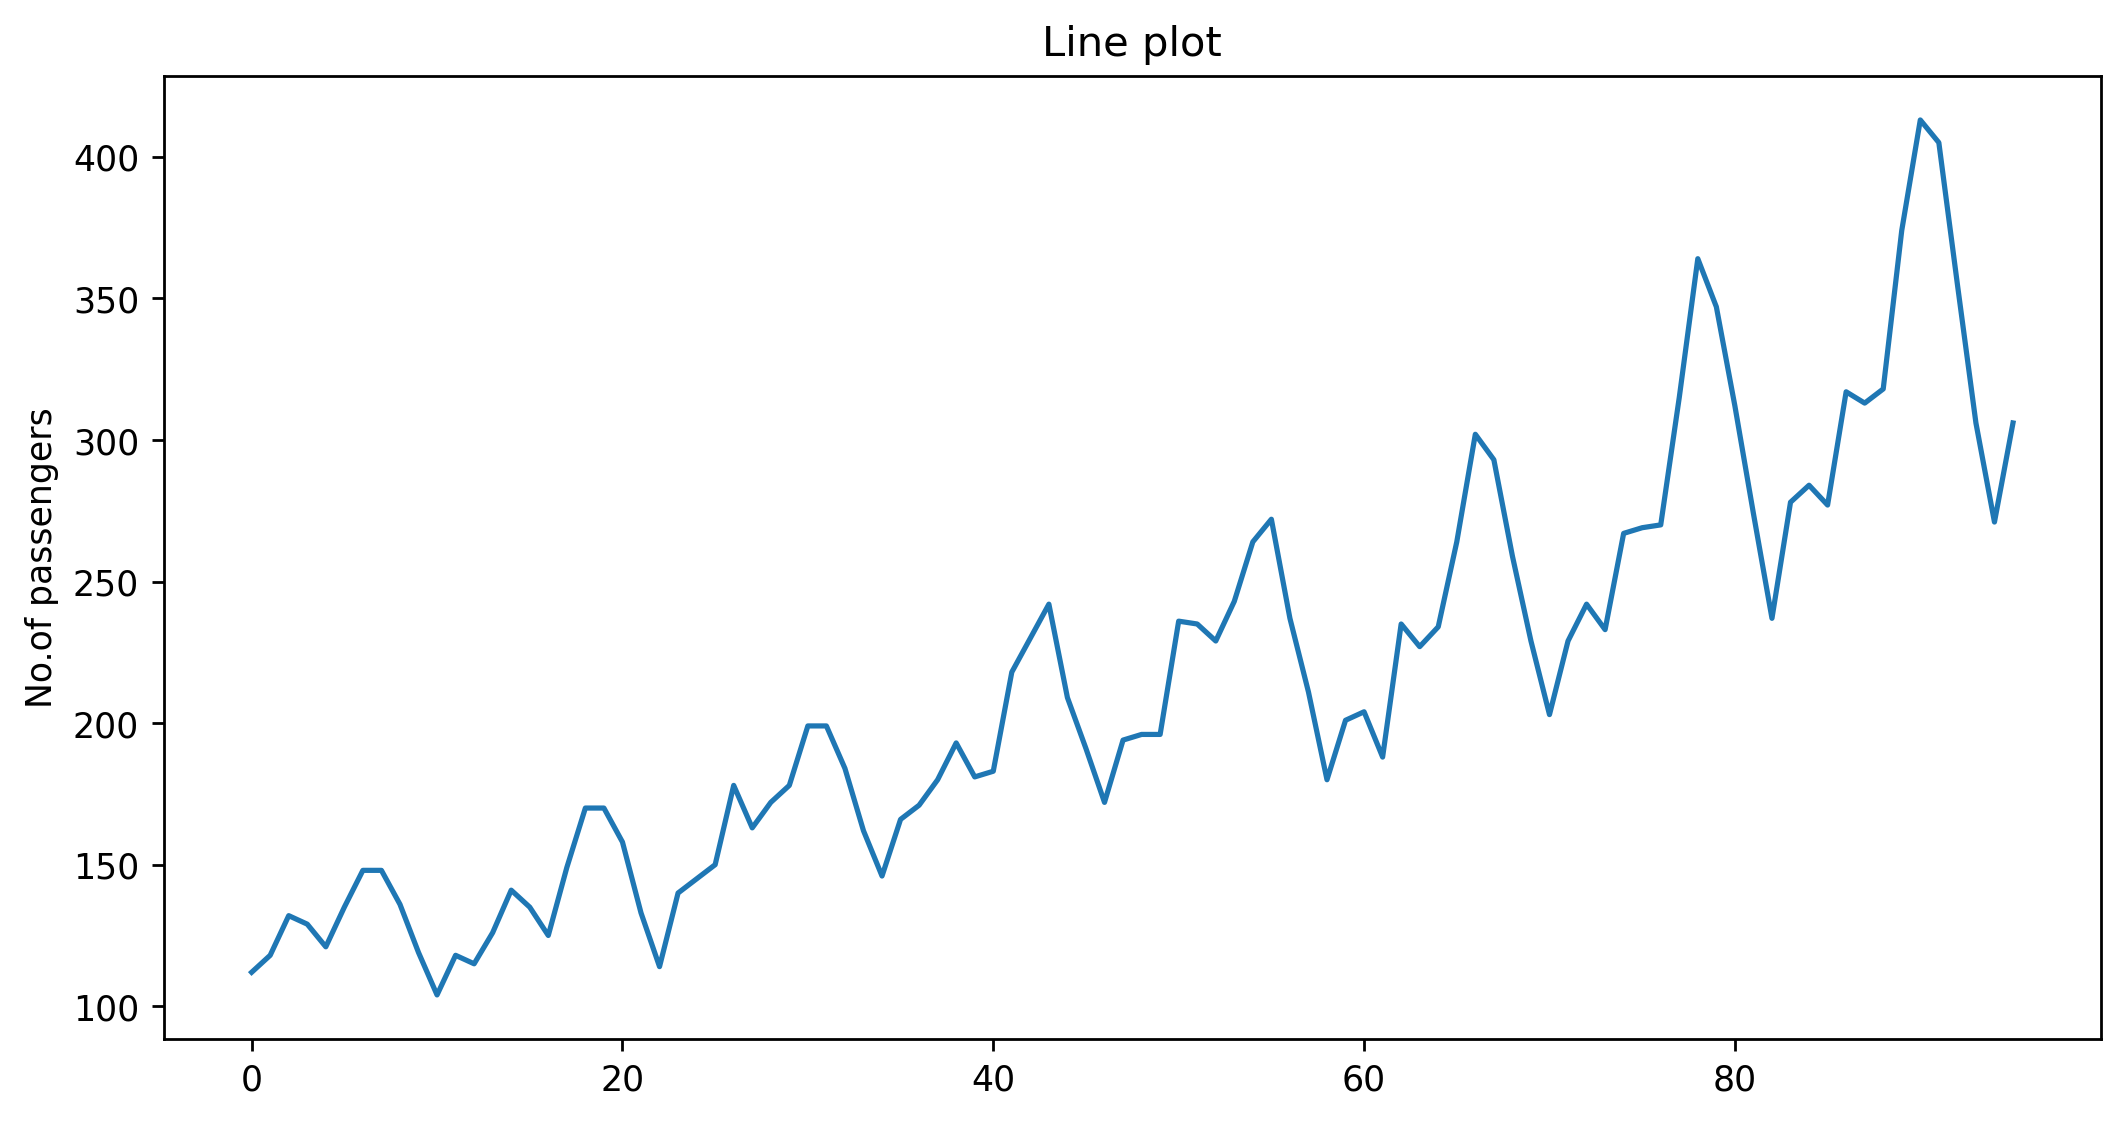

In [5]:
#visualizing the overall data in order to the component present in our data

plt.title("Line plot")
plt.ylabel("No.of passengers")
plt.plot(df['Passengers'])

In [6]:
df['Date'] = pd.to_datetime(df.Month,format="%Y-%M")

# To extract Month
df['month'] = df.Date.dt.strftime("%b")

# To extract Year
df['year'] = df.Date.dt.strftime("%Y")

In [7]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))

In [9]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df = pd.concat([df,month_dummies], axis = 1)
df

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
df['t'] = np.arange(1,97)

df['t_squared'] = df['t']*df['t']

df.columns

df['log_Passengers'] = np.log(df['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

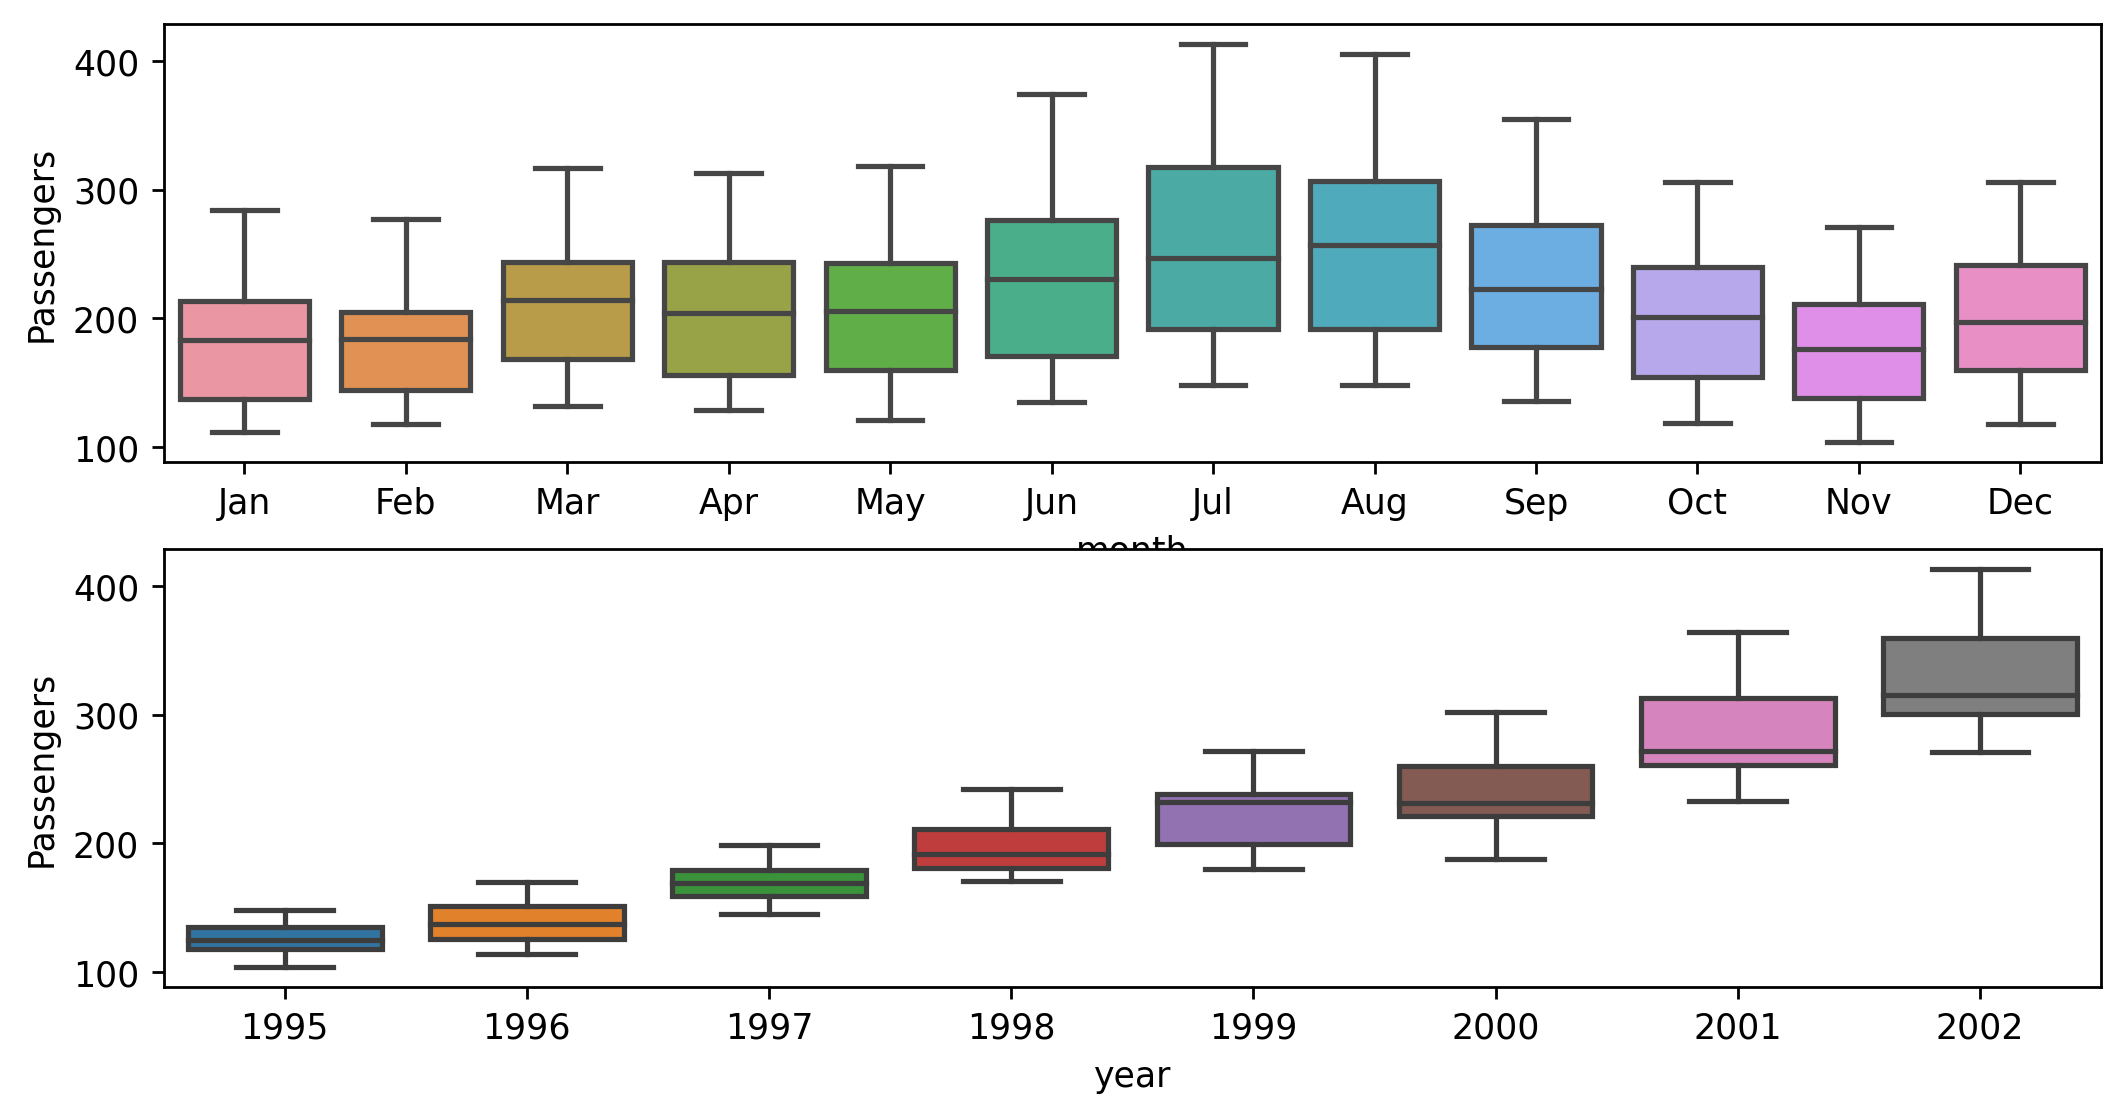

In [12]:
plt.subplot(211)
sns.boxplot(x = 'month', y = 'Passengers', data = df)

plt.subplot(212)
sns.boxplot(x = 'year', y = 'Passengers', data = df)

# Lag Plot

Text(0.5, 1.0, 'Lag Plot')

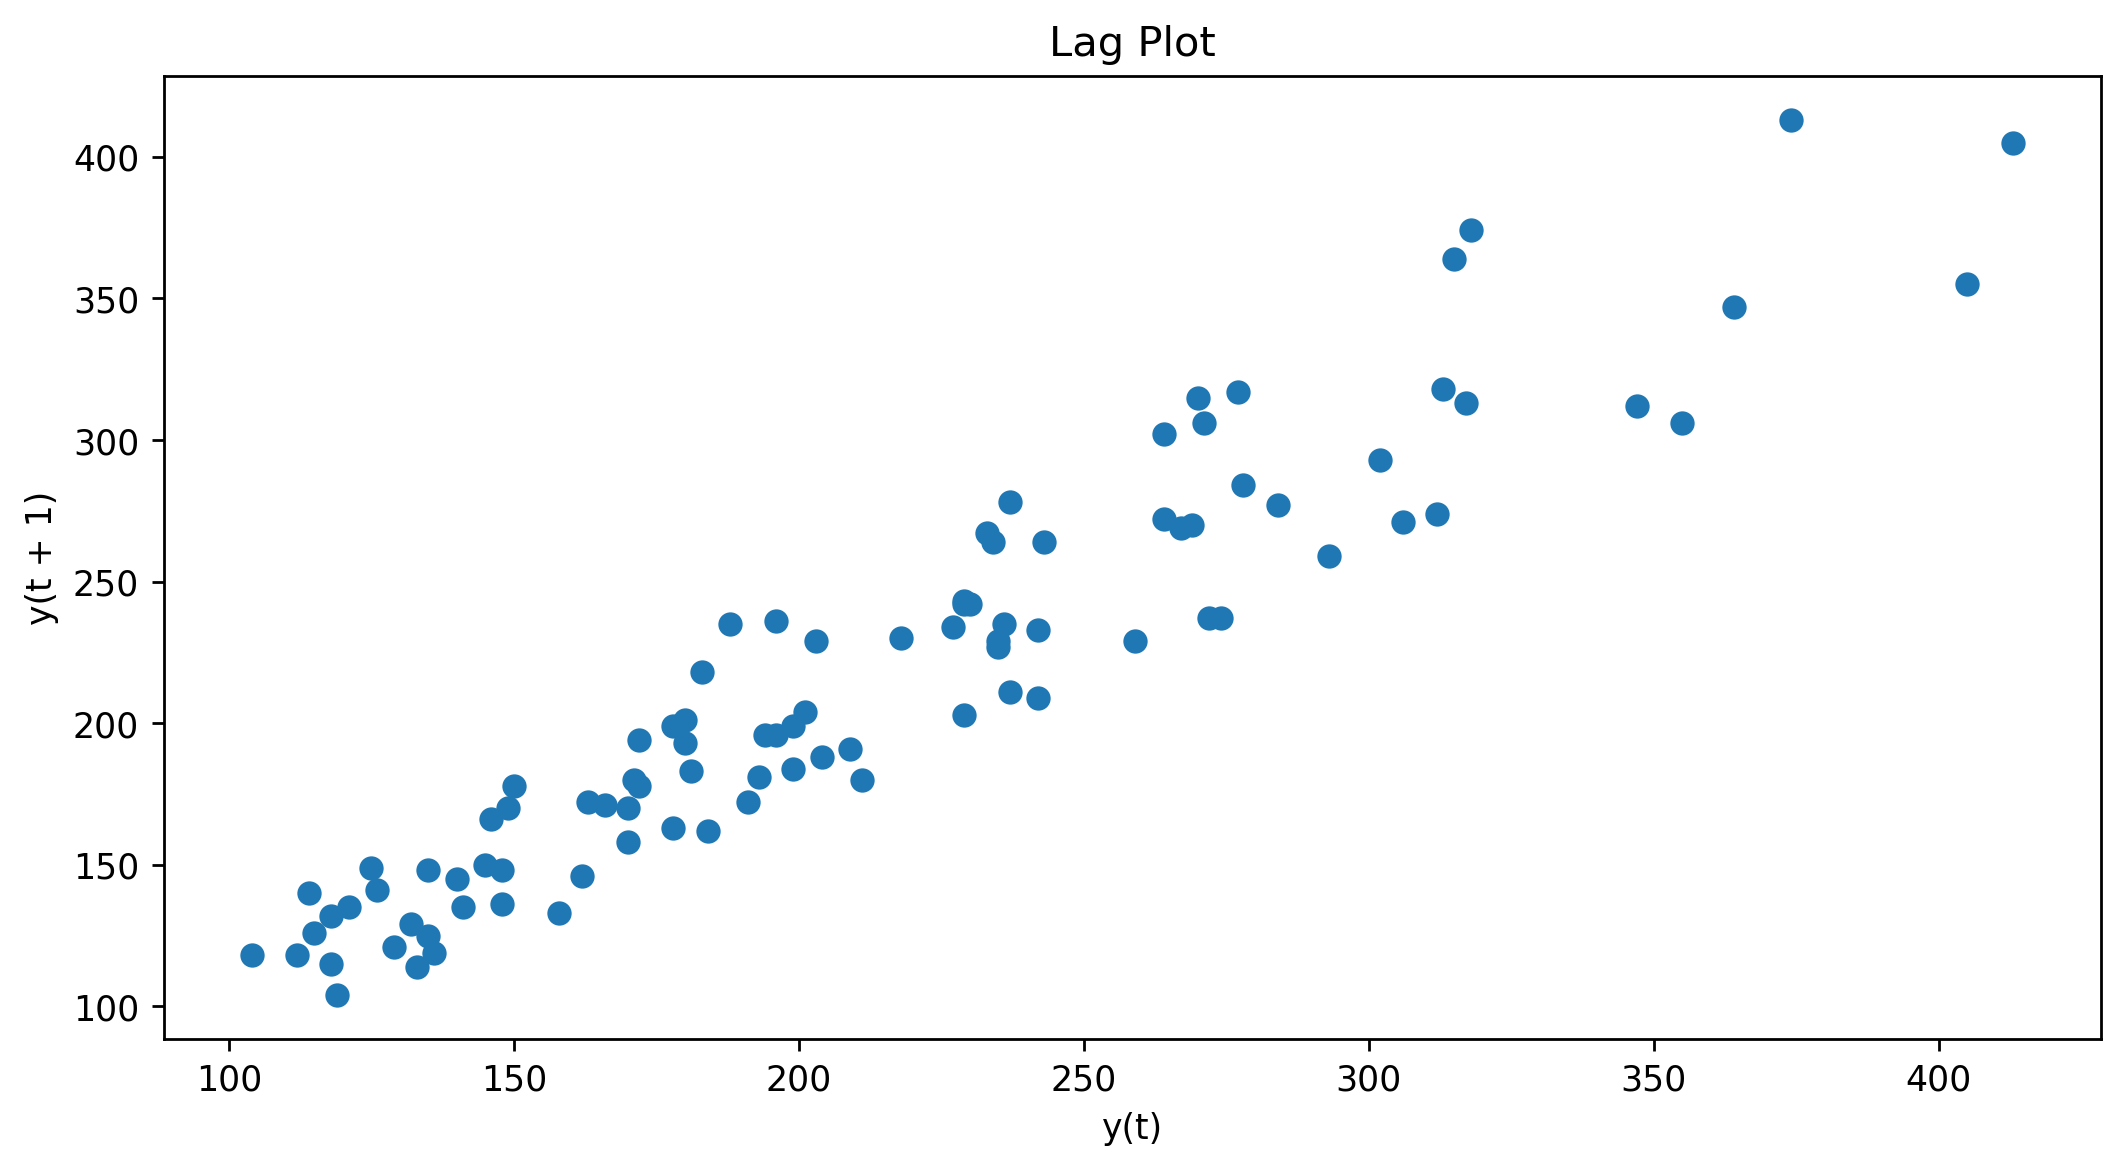

In [13]:
lag_plot(df['Passengers'])
plt.title('Lag Plot')

# Acf Plot

Text(0, 0.5, 'Autocorrelation (r2 value)')

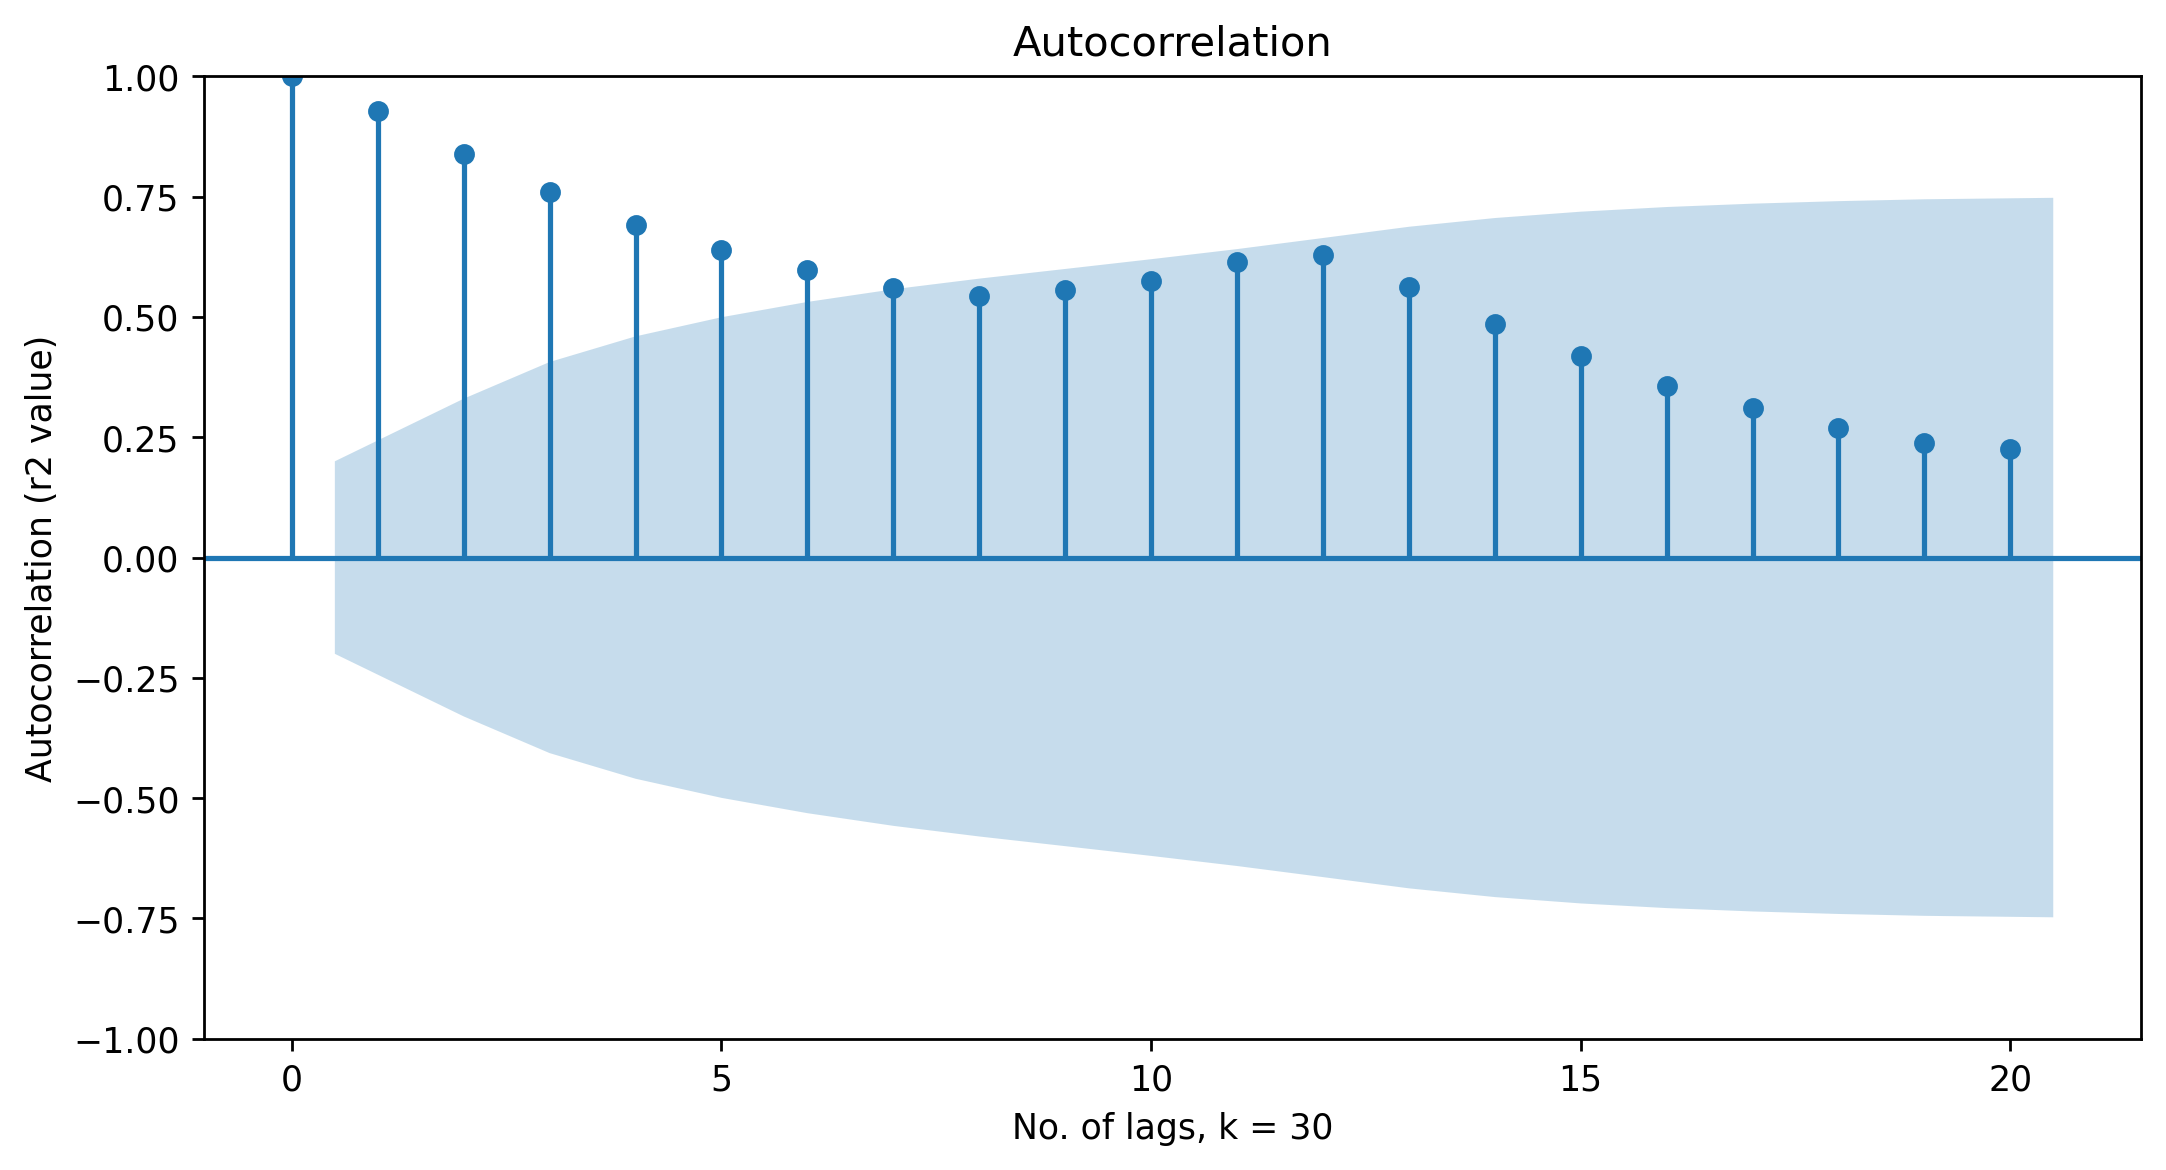

In [14]:
plot_acf(df['Passengers'])

plt.xlabel('No. of lags, k = 30')
plt.ylabel('Autocorrelation (r2 value)')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

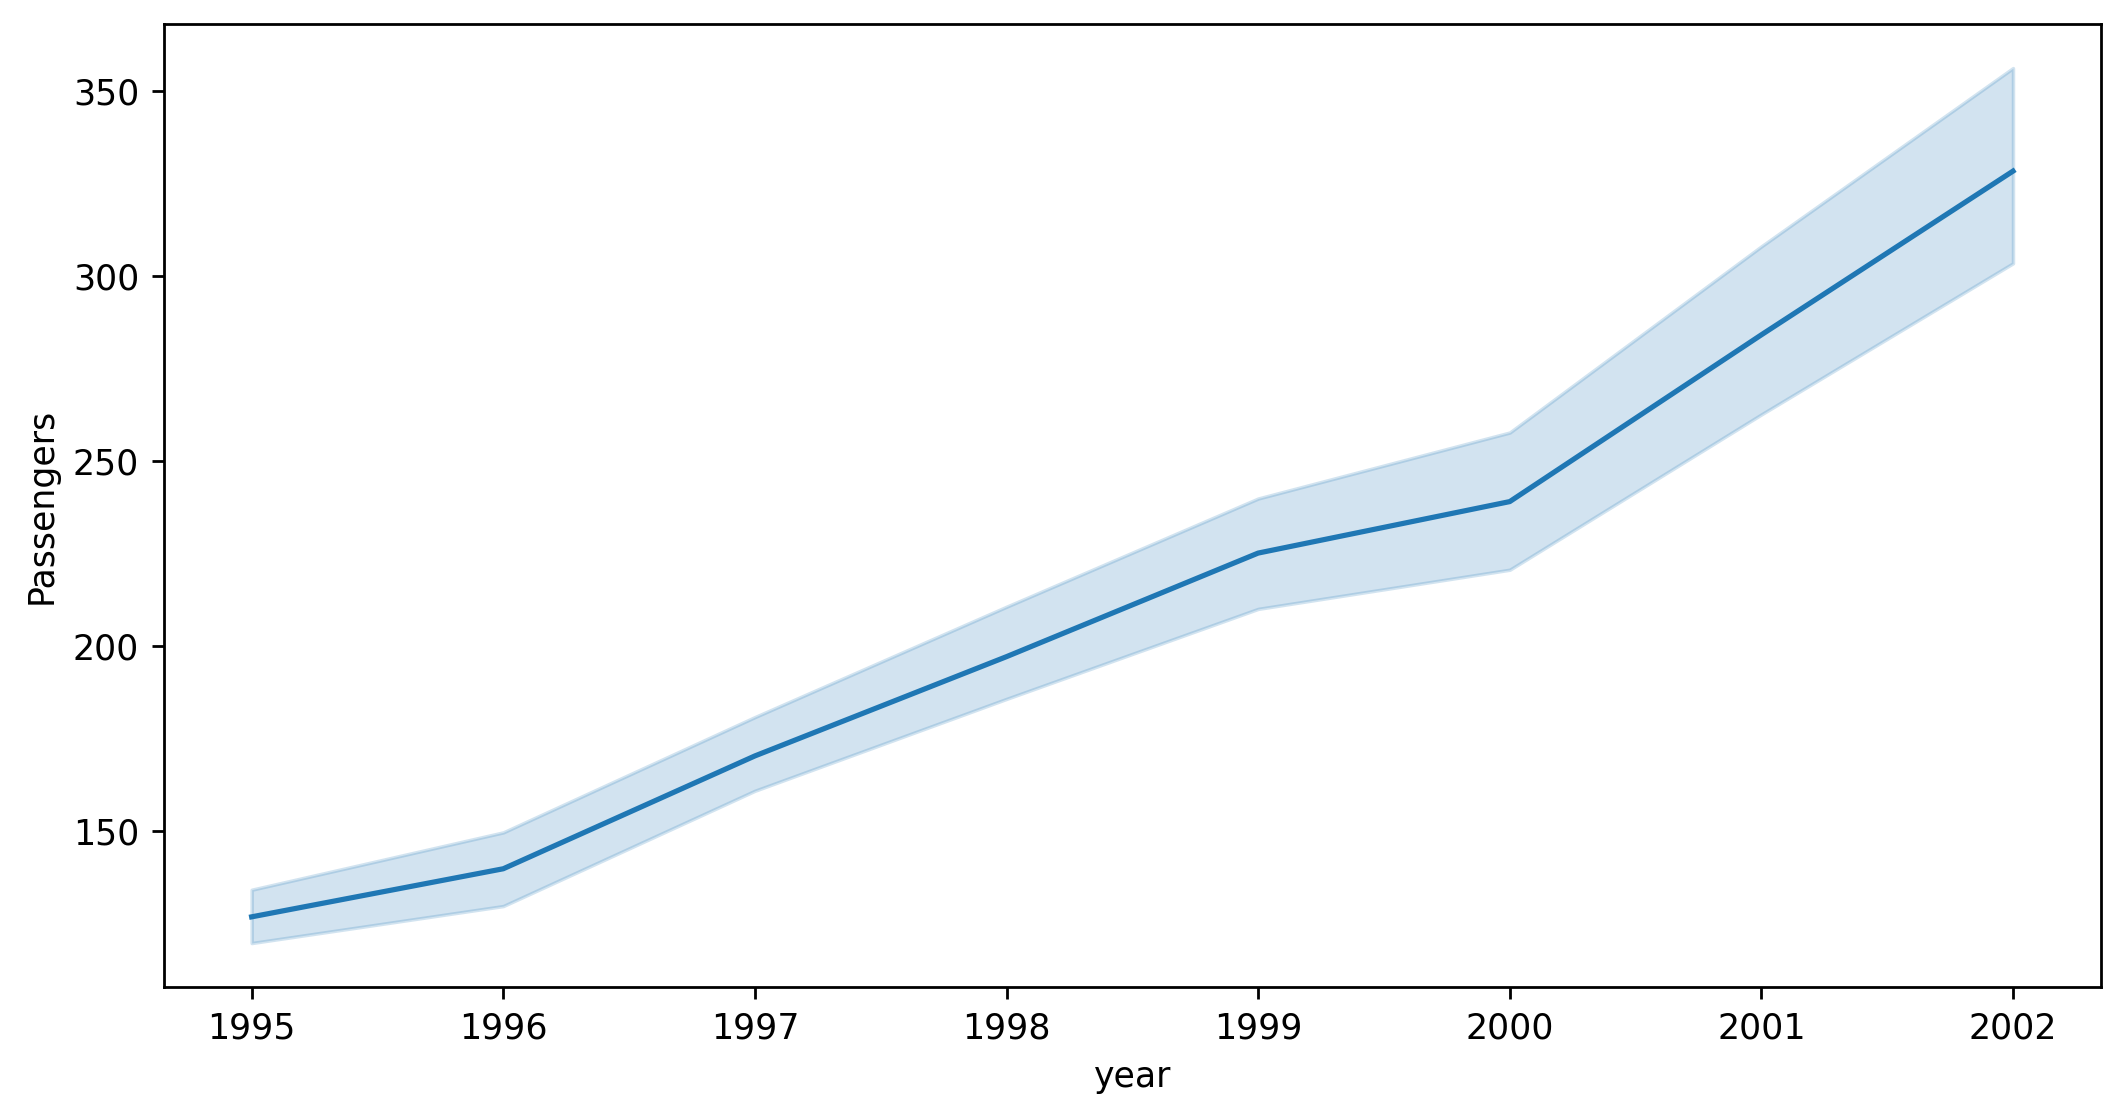

In [15]:
sns.lineplot(x="year",y="Passengers",data=df)

In [16]:
train = df.head(80)

test = df.head(16)

In [17]:
train

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,2001-04-01,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,2001-05-01,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,2001-06-01,Jun,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,2001-07-01,Jul,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154


In [18]:
test

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,6,36,4.905275
6,1995-07-01,148,1995-07-01,Jul,1995,0,0,0,0,0,1,0,0,0,0,0,0,7,49,4.997212
7,1995-08-01,148,1995-08-01,Aug,1995,0,1,0,0,0,0,0,0,0,0,0,0,8,64,4.997212
8,1995-09-01,136,1995-09-01,Sep,1995,0,0,0,0,0,0,0,0,0,0,0,1,9,81,4.912655
9,1995-10-01,119,1995-10-01,Oct,1995,0,0,0,0,0,0,0,0,0,0,1,0,10,100,4.779123


# Linear Model

In [19]:
linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear  = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear  = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("Root Mean Square Error : ",rmse_linear)

Root Mean Square Error :  15.599453183317383


# Exponential Model

In [20]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

13.706587164880021

# Quadratic Model

In [21]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  13.770274265456045


# Additive Seasonality

In [22]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

64.03521161241804

# Additive Seasonality Quadratic

In [23]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  9.929221656954077


# Multiplicative Seasonality

In [24]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

57.65234201748222

# Multiplicative Seasonality Exponential

In [25]:
Mul_sea_exp = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea_exp = pd.Series(Mul_sea_exp.predict(test))
rmse_Mult_sea_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea_exp)))**2))
rmse_Mult_sea_exp

4.832048266773971

In [26]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_sea_exp"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_exp])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_sea_exp,4.832048
4,rmse_add_sea_quad,9.929222
1,rmse_Exp,13.706587
2,rmse_Quad,13.770274
0,rmse_linear,15.599453
5,rmse_Mult_sea,57.652342
3,rmse_add_sea,64.035212


# Model Building

In [27]:
final_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()

In [28]:
pred_new = pd.Series(final_model.predict(df))
pred_new

0     4.693857
1     4.709450
2     4.853814
3     4.818083
4     4.808364
        ...   
91    5.971032
92    5.861712
93    5.734631
94    5.605119
95    5.740344
Length: 96, dtype: float64

In [29]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

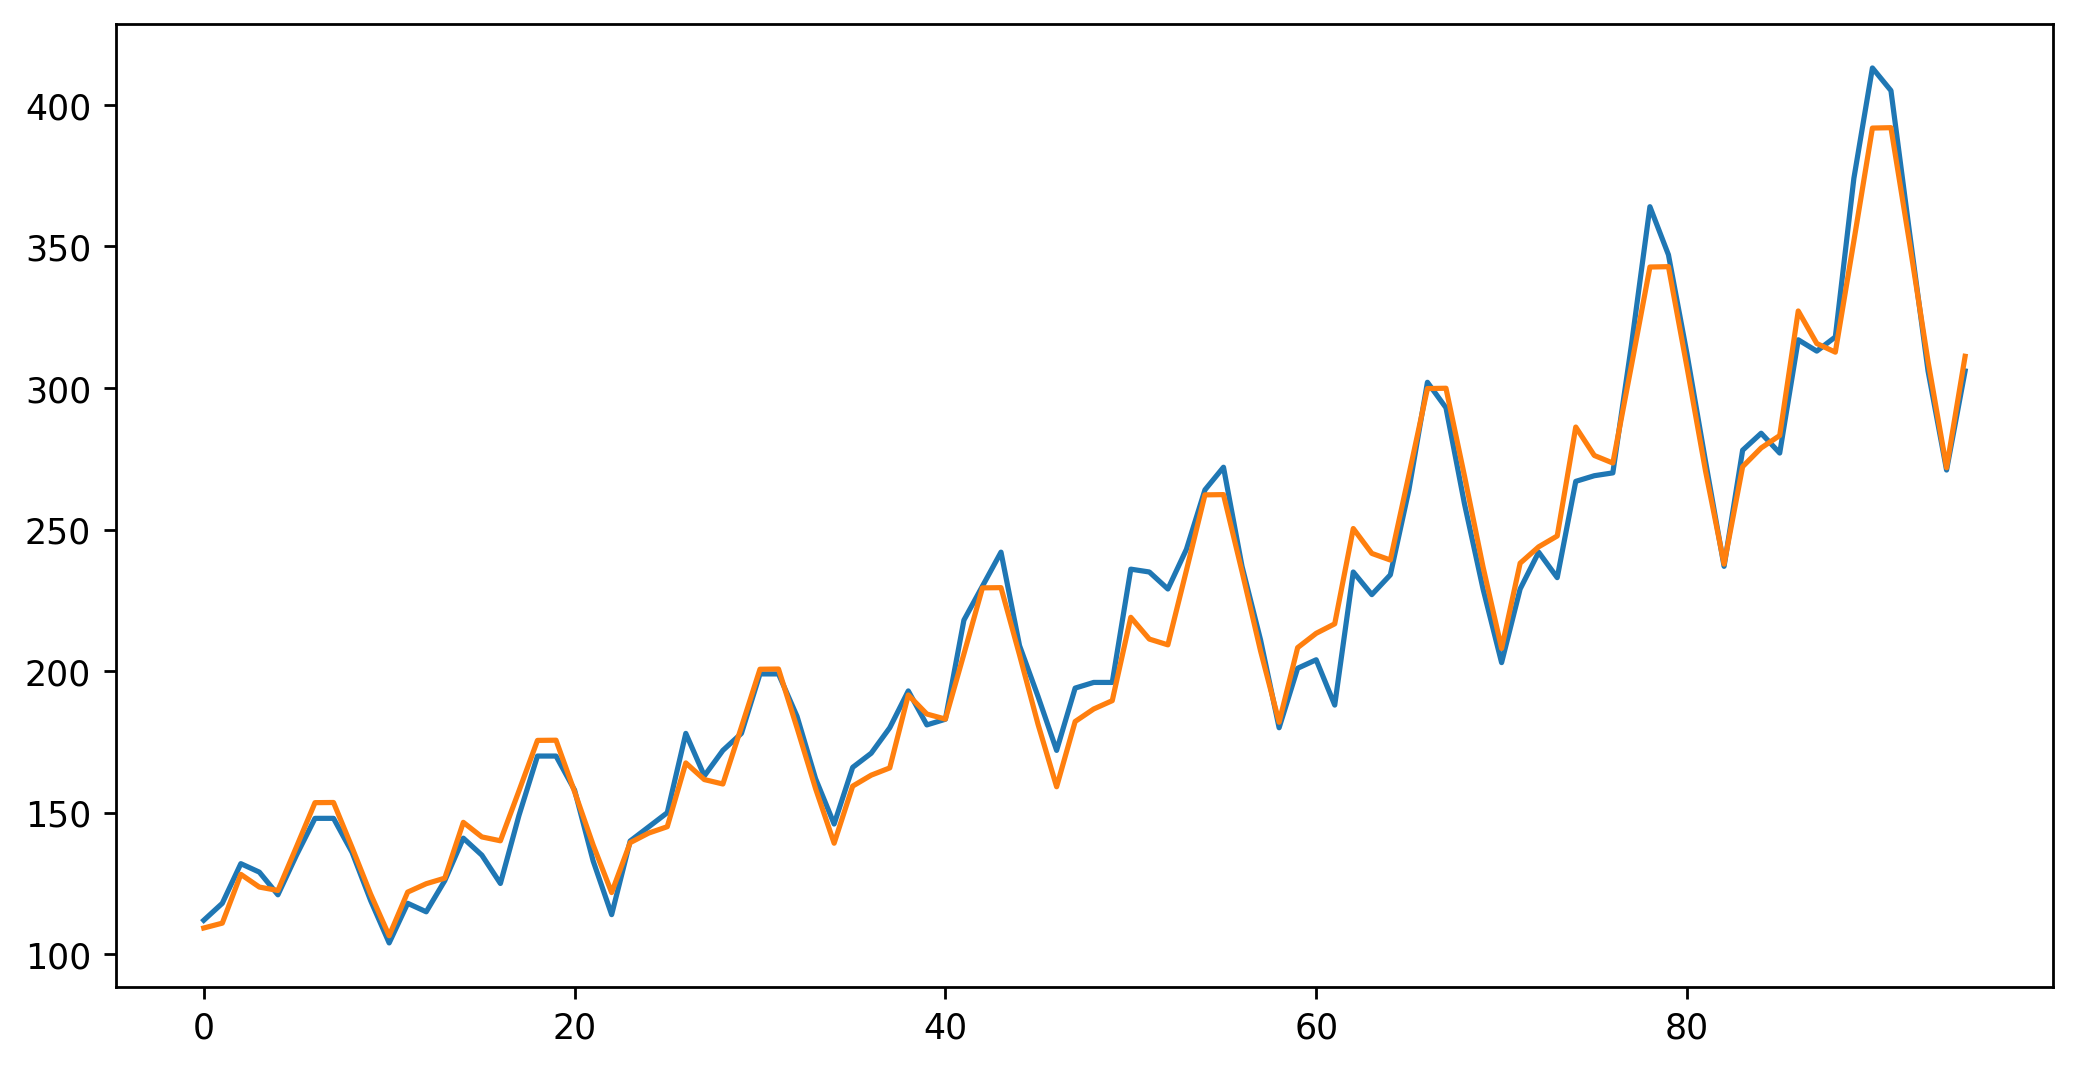

In [30]:
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))